Original Column Names: Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')
Columns renamed to: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Dataset Overview:
         sepal_length         sepal_width        petal_length  \
0        SepalLength          SepalWidth         PetalLength   
1  7.303274553127926  2.4750252534128063  2.1760486154633614   
2  7.556927655410556   2.987381008530221  1.9215846218548323   
3  5.254016373665658  2.0935160238309827   3.672563875820435   
4  6.409620271630198  2.2110415805023966   1.812868616156213   

          petal_width     species  
0          PetalWidth     Species  
1  0.6950029791866986      Setosa  
2  1.1726148049564784  Versicolor  
3  0.5504235628446024   Virginica  
4   1.745372347536642  Versicolor  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


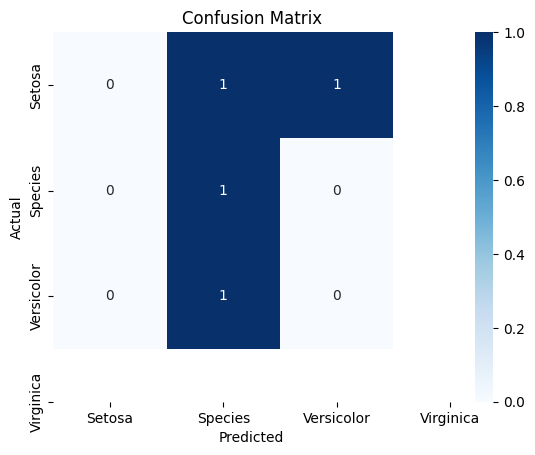

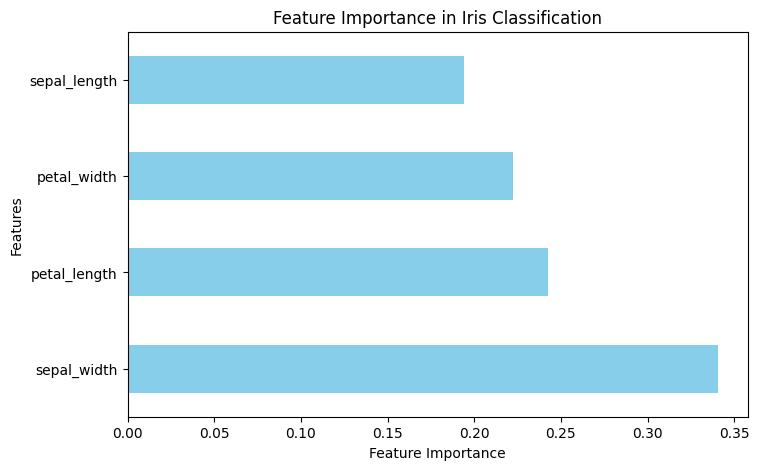

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = '/content/iris_data.csv'

df = pd.read_csv(file_path)
print("Original Column Names:", df.columns)

# Ensure 'species' column exists
expected_columns = {'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'}
if not expected_columns.issubset(df.columns):
    print("Warning: Expected columns not found. Checking possible issues...")
    df = pd.read_csv(file_path, header=None)
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    print("Columns renamed to:", df.columns)

# Display basic dataset info
print("Dataset Overview:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())

# Encode the target variable
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Check class distribution before splitting
print("\nClass Distribution:\n", df['species'].value_counts())

# Ensure all classes have at least two samples
class_counts = df['species'].value_counts()
if class_counts.min() < 2:
    print("Warning: Some classes have fewer than 2 samples. Removing them...")
    df = df[df['species'].map(class_counts) >= 2]

# Split data into features and target
X = df.drop(columns=['species'])
y = df['species']

# Handle small class issue by removing stratify if needed
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
except ValueError:
    print("Stratification failed due to low class counts. Proceeding without stratify...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier with optimized parameters
model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualizing feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 5))
feature_importances.nlargest(4).plot(kind='barh', color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Iris Classification')
plt.show()